In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
file_path =  "C:/Users/Lenovo/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv"
df = pd.read_csv(file_path)


In [20]:
df["SETTLEMENTDATE"] = pd.to_datetime(df["SETTLEMENTDATE"], format="%Y/%m/%d %H:%M:%S")
df = df.sort_values(by="SETTLEMENTDATE")
df.set_index("SETTLEMENTDATE", inplace=True)

In [21]:
df["timestamp"] = (df.index - df.index[0]).total_seconds()


In [22]:
X = df["timestamp"].values.reshape(-1, 1)
y = df["TOTALDEMAND"].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
index_values = df.index.to_numpy()

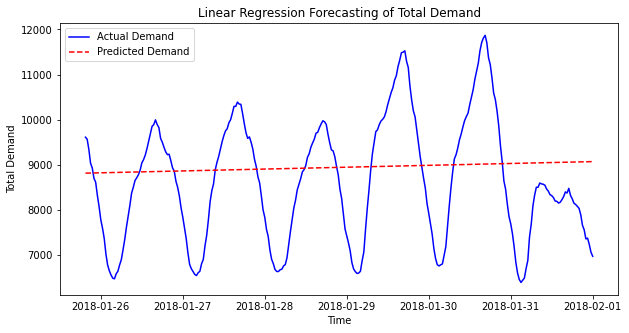

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(index_values[len(X_train):], y_test, label="Actual Demand", color="blue")
plt.plot(index_values[len(X_train):], y_pred, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Total Demand")
plt.title("Linear Regression Forecasting of Total Demand")
plt.legend()
plt.show()


In [29]:
index_values = np.array(df.index[len(X_train):])

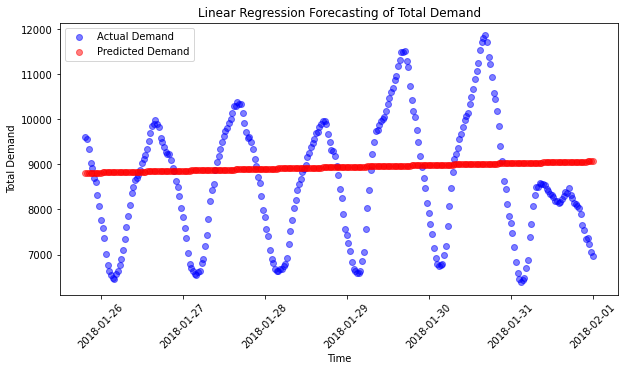

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(index_values, y_test, label="Actual Demand", color="blue", alpha=0.5)
plt.scatter(index_values, y_pred, label="Predicted Demand", color="red", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Total Demand")
plt.title("Linear Regression Forecasting of Total Demand")
plt.legend()
plt.xticks(rotation=45)
plt.show()


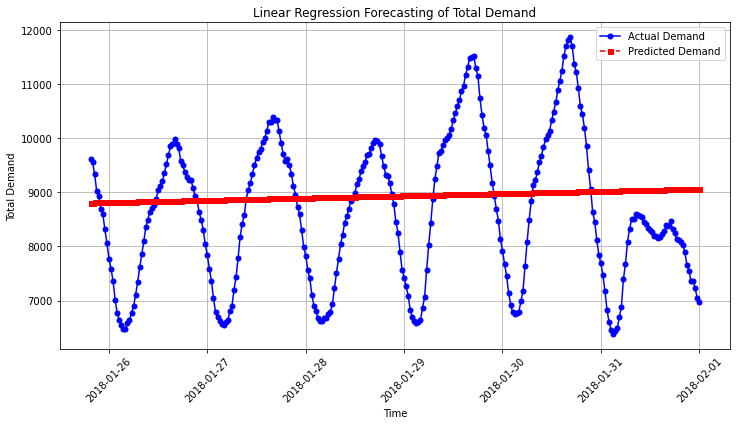

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(index_values, y_test, label="Actual Demand", color="blue", marker="o", linestyle="-", markersize=5)
plt.plot(index_values, y_pred, label="Predicted Demand", color="red", marker="s", linestyle="--", markersize=5)
plt.xlabel("Time")
plt.ylabel("Total Demand")
plt.title("Linear Regression Forecasting of Total Demand")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
